# 03 Feature Selection

In this notebook, we perform feature selection on the engineered and preprocessed dataset. We employ three strategies:

1. **Correlation Filtering** – Removing features that are highly correlated.
2. **Recursive Feature Elimination (RFE)** – Using a RandomForestClassifier to recursively eliminate less important features.
3. **Boruta Feature Selection** – Using the Boruta algorithm with a RandomForestClassifier as the estimator.

## Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
import yaml

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

In [3]:
from utils.feature_selection import correlation_filter, rfe_feature_selection, boruta_feature_selection

In [4]:
from data.split_data import split_data_by_time

In [5]:
with open('../src/utils/constants.yaml', 'r') as file:
    constants = yaml.safe_load(file)

In [6]:
PREDEFINED_FEATURES_TO_USE = constants['FEATURES_TO_USE']

## Loading preprocessed data

In [7]:
data_path = "../data/processed/processed_data.csv"
df = pd.read_csv(data_path)
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (150000, 45)


,a,b,c,d,e,f,g,h,i,j,...,i_num_count_agrup,i_cleaned,i_word_original,i_word_kit,i_word_gb,i_word_ram,j_cluster,j_cluster_agrup,k_bin,o_transformed
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,...,0,maquininha corta barba cabelo peito perna pelo...,0,0,0,0,1,0,3,2
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,...,0,avental descartavel manga longa 50 un tnt ho...,0,0,0,0,7,0,1,1
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,...,0,bicicleta mountain fire bird rodado 29 alumini...,0,0,0,0,6,0,2,2
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,...,0,caneta delineador carimbo olho gatinho longo 2...,0,0,0,0,8,0,0,2
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,...,0,resident evil operation raccoon city ps3,0,0,0,0,1,0,3,2


In [8]:
X_train, X_test, y_train, y_test = split_data_by_time(df)

In [9]:
X_train = X_train[PREDEFINED_FEATURES_TO_USE]
X_test = X_test[PREDEFINED_FEATURES_TO_USE]

## Applying correlation Filter

In [10]:
# Identify features to drop based on high correlation (recomended only for numerical x nummerical but can be used as an approximation)
drop_features = correlation_filter(X_train, threshold=0.9)
print("Features to drop based on correlation filtering:", drop_features)

Features to drop based on correlation filtering: []


In [11]:
# Remove the highly correlated features
X_corr_filtered = X_train.drop(columns=drop_features)
print("Shape after correlation filtering:", X_corr_filtered.shape)

Shape after correlation filtering: (90063, 24)


## Recursive Feature Elimination (RFE) with RandomForestClassifier

In [12]:
# Select top N features using RFE with RandomForestClassifier
selected_features_rfe = rfe_feature_selection(X_corr_filtered, y_train)
print("Selected features via RFE:", selected_features_rfe)

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.


In [13]:
list_selected_features_rfe = selected_features_rfe[0]

## Boruta Feature Selection

In [14]:
# Select features using the Boruta algorithm
selected_features_boruta = boruta_feature_selection(X_corr_filtered, y_train, max_iter=100, random_state=42)
print("Selected features via Boruta:", selected_features_boruta)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	24
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	15
Tentative: 	1
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	15
Tentative: 	1
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	15
Tentative: 	1
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	15
Tentative: 	1
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	15
Tentative: 	1
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	15
Tentative: 	1
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	15
Tentative: 	1
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	15
Tentative: 	1
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	15
Tentative: 	1
Rejected: 	8
I

## Compare and Visualize Selected Features

In [15]:
# Compare features between RFE and Boruta
features_from_both_methods = set(list_selected_features_rfe) | set(selected_features_boruta)
print("Common features selected by both methods:", features_from_both_methods)

Common features selected by both methods: {'c', 'l', 'periodo_num', 'a_bin', 'm', 'p', 'b', 'o_transformed', 'g_agrup_simples_num', 'e', 'j_cluster_agrup', 'f', 'd', 'n', 'i_len', 'monto'}


In [17]:
print(f'Selected {len(features_from_both_methods)} features:', ', '.join(list(features_from_both_methods)))
print(f'Not selected {len([i for i in X_corr_filtered.columns if i not in list(features_from_both_methods)])} features:',', '.join([i for i in X_corr_filtered.columns if i not in list(features_from_both_methods)]))

Selected 16 features: c, l, periodo_num, a_bin, m, p, b, o_transformed, g_agrup_simples_num, e, j_cluster_agrup, f, d, n, i_len, monto
Not selected 8 features: i_special_chars_agrup, i_num_count_agrup, i_word_original, i_word_kit, i_word_gb, i_word_ram, k_bin, is_weekend


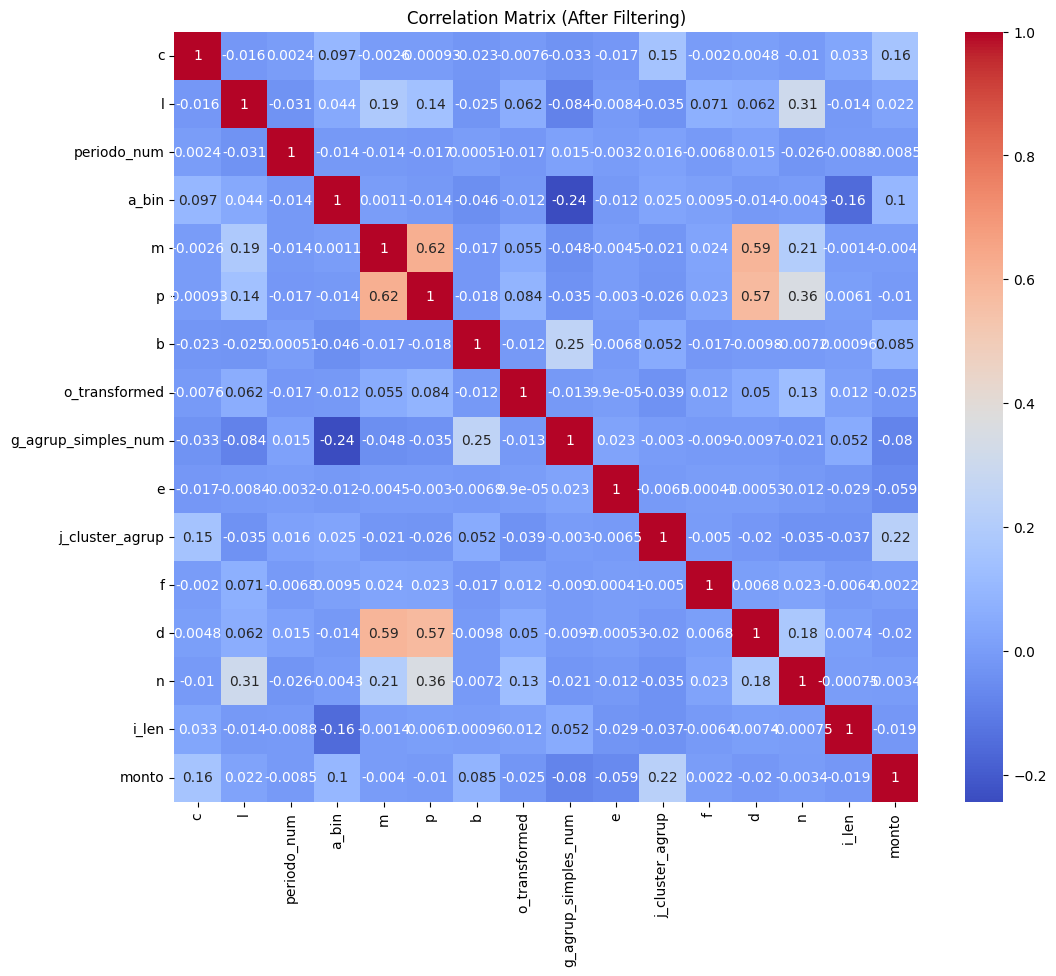

In [18]:
# Visualize the correlation matrix of features after filtering
plt.figure(figsize=(12, 10))
sns.heatmap(X_corr_filtered[list(features_from_both_methods)].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (After Filtering)")
plt.show()